# Importiere Daten


In [69]:

# import os,sys
import numpy as np
import pandas as pd
import geopandas as gp
import xarray as xr
import datetime
from matplotlib import pyplot as plt
# import subprocess


## Funktionen definieren

In [70]:
def select_every_12th_with_start(arr, start_index):
    if start_index < 1 or start_index > 12:
        raise ValueError("Start index must be between 1 and 11")

    selected_elements = []
    for i in range(start_index - 1, len(arr), 12):
        selected_elements.append(arr[i])
    
    return selected_elements

## Daten importieren

In [71]:
# File paths
TMin_file = 'data/cru_ts4.07.1901.2022.tmn.dat.nc/cru_ts4.07.1901.2022.tmn.dat.nc'
TMax_file = 'data/cru_ts4.07.1901.2022.tmx.dat.nc/cru_ts4.07.1901.2022.tmx.dat.nc'

# Load datasets
TMin = xr.open_dataset(TMin_file)
TMax = xr.open_dataset(TMax_file)



## Differenz berechnen

In [72]:
temperature_difference = TMax.tmx - TMin.tmn   # Normale Differenz fü jeden Punkt

In [73]:
#Projeziert auf eine latitude
TMin_Lat = TMin.mean('lon')
TMax_Lat = TMax.mean('lon')

In [74]:
temperature_difference_Lat = TMax_Lat.tmx- TMin_Lat.tmn # Creating lateral difference

In [75]:
TMin_Lat

<xarray.Dataset>
Dimensions:  (lat: 360, time: 1464)
Coordinates:
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2022-12-16
Data variables:
    tmn      (time, lat) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    stn      (time, lat) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [76]:
np.count_nonzero(~np.isnan(TMax_Lat.tmx.isel(time = 0)))
# temperature_difference.isel(time =0,lat = 330, lon = 265)

280

In [77]:
time_values = TMax['time'].values

## Plots

(8294.0, 11338.0)

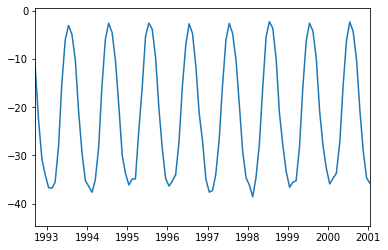

In [78]:
plt.plot(time_values, TMin_Lat.isel(lat = 330).tmn)
plt.xlim(time_values[1100], time_values[1200])

In [79]:
steps = [60.25, 65.25, 70.25, 75.25, 80.25, 85.25]

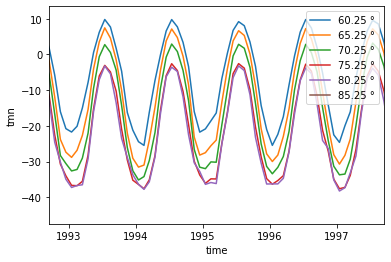

In [80]:
# Plot tmn
for i in steps:
    plt.plot(time_values, TMin_Lat.sel(lat = str(i)).tmn, label = str(i)+' °')

plt.xlabel('time')
plt.ylabel('tmn')

plt.xlim(time_values[1100], time_values[1160])
plt.legend(loc = 1)

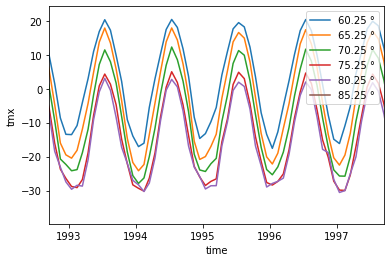

In [81]:
# Plot tmx
for i in steps:
    plt.plot(time_values, TMax_Lat.sel(lat = str(i)).tmx, label = str(i)+' °')

plt.xlabel('time')
plt.ylabel('tmx')

plt.xlim(time_values[1100], time_values[1160])
plt.legend(loc = 1)

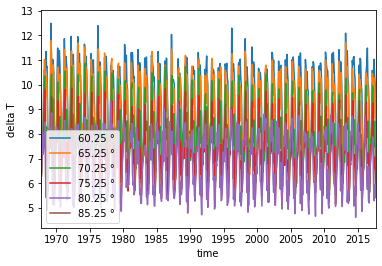

In [82]:
# Plot tmx
for i in steps:
    plt.plot(time_values, temperature_difference_Lat.sel(lat = str(i)), label = str(i)+' °')

plt.xlabel('time')
plt.ylabel('delta T')

plt.xlim(time_values[800], time_values[1400])
plt.legend(loc = 3)

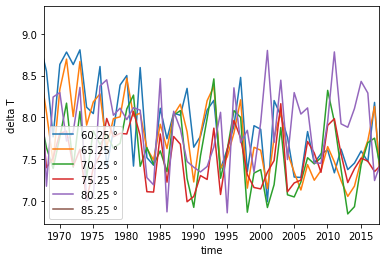

In [83]:
# Nach Jahreszeiten selektiert Januar

for i in steps:
    plt.plot(time_values[::12], temperature_difference_Lat.sel(lat = str(i))[::12], label = str(i)+' °')

plt.xlabel('time')
plt.ylabel('delta T')

plt.xlim(time_values[800], time_values[1400])
plt.legend(loc = 3)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

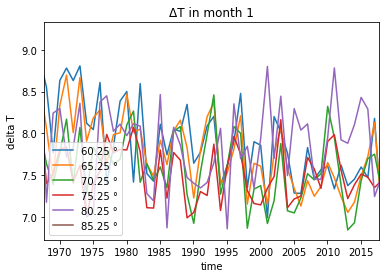

In [84]:
# Nach Jahreszeiten selektiert Januar
month = 1

for i in steps:
    plt.plot(select_every_12th_with_start(time_values,month), select_every_12th_with_start(temperature_difference_Lat.sel(lat = str(i)),month), label = str(i)+' °')

plt.xlabel('time')
plt.ylabel('delta T')

plt.title('ΔT in month ' + str(month))

plt.xlim(time_values[800], time_values[1400])
plt.legend(loc = 3)

plt.tight_layout

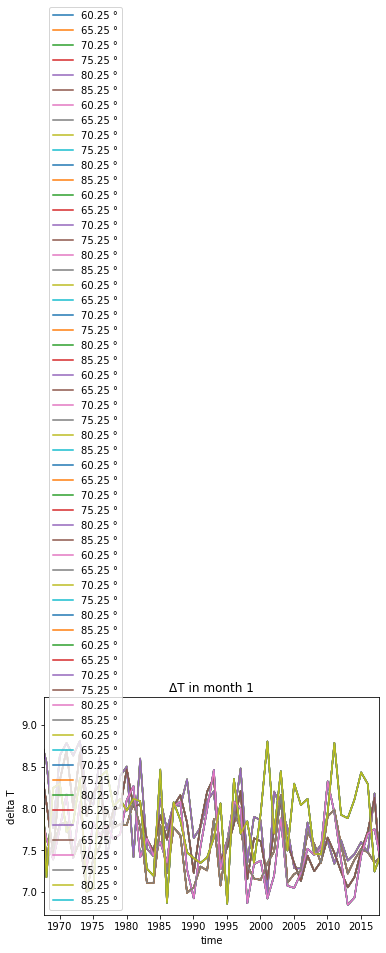

In [85]:
for month in range(1,11):
    # Nach Jahreszeiten selektiert Januar
    month = 1

    for i in steps:
        plt.plot(select_every_12th_with_start(time_values,month), select_every_12th_with_start(temperature_difference_Lat.sel(lat = str(i)),month), label = str(i)+' °')

    plt.xlabel('time')
    plt.ylabel('delta T')

    plt.title('ΔT in month ' + str(month))

    plt.xlim(time_values[800], time_values[1400])
    plt.legend(loc = 3)

    plt.tight_layout
    plt.savefig('Delta_T_Month_'+str(month)+'.pdf')

In [91]:
import matplotlib.pyplot as plt

# Assuming you have defined steps, time_values, and temperature_difference_Lat somewhere above

for month in range(1, 12):
    for i in steps:
        plt.plot(
            select_every_12th_with_start(time_values, month),
            select_every_12th_with_start(temperature_difference_Lat.sel(lat=str(i)), month),
            label=str(i) + ' °'
        )

    plt.xlabel('time')
    plt.ylabel('delta T')

    plt.title('ΔT in month ' + str(month))

    plt.xlim(time_values[800], time_values[1400])
    plt.legend(loc=3)

    plt.tight_layout()  # Add parentheses here

    plt.savefig('Delta_T_Month_' + str(month) + '.png', dpi = 300)
    plt.clf()  # Clear the plot for the next iteration


<Figure size 432x288 with 0 Axes>

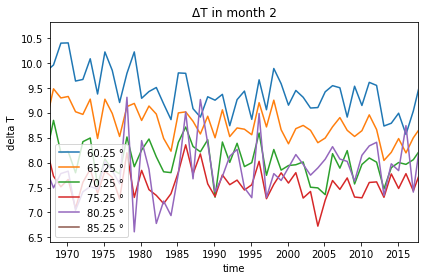

In [86]:
# Nach Jahreszeiten selektiert Januar
month = 2

for i in steps:
    plt.plot(select_every_12th_with_start(time_values,month), select_every_12th_with_start(temperature_difference_Lat.sel(lat = str(i)),month), label = str(i)+' °')

plt.xlabel('time')
plt.ylabel('delta T')
plt.title('ΔT in month ' + str(month))

plt.xlim(time_values[800], time_values[1400])
plt.legend(loc = 3)

plt.tight_layout()

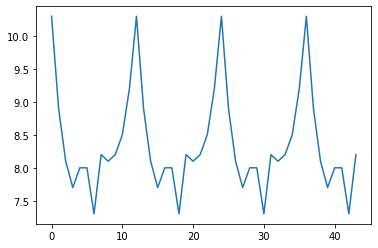

In [87]:

plt.plot(temperature_difference.isel(time =range(3,47, 1),lat = 330, lon = 265))

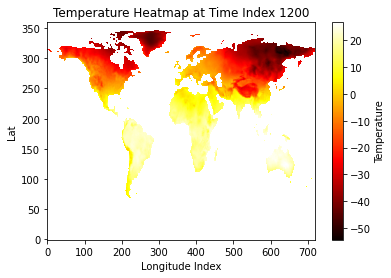

In [88]:
time_index = 1200
temperature_data = TMin.isel(time=time_index).tmn#,lon = range(0,260), lat = range(330,360)).tmn

plt.imshow(temperature_data, cmap='hot', origin='lower', aspect='auto')
plt.colorbar(label='Temperature')
plt.title(f'Temperature Heatmap at Time Index {time_index}')
plt.xlabel('Longitude Index')
plt.ylabel('Lat')
plt.show()